## Ucitavanje podataka

Set podataka se sastoji od podataka prikupljenih od ljudi zarazenih virusom Hepatitis C. Podaci su anonimni i sadrze samo podatke o broju godina, polu i BMI-u, podatke o simptomima podeljenim u 7 kolona sa informacijom o prisutnosti simptoma, kao i dodatne medicinske podatke i podatke vezane za tok terapije.<br>
Sve karakteristike su predstavljene celobrojnim vrednostima.<br>
Set podataka sadrzi ukupno 29 karakteristika i 1385 instanci (obzervacija).

In [1]:
import pandas as pd
import numpy as np
import pydotplus
from IPython.core.display import Image
from scipy.stats import uniform
from sklearn.calibration import CalibratedClassifierCV
from sklearn.covariance import EllipticEnvelope
from sklearn.decomposition import PCA
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score, learning_curve, validation_curve, \
    GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.pipeline import make_pipeline, Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import sys
import matplotlib.pyplot as plt
import seaborn as sns

original = pd.read_csv('HCV-Egy-Data.csv')
dataframe = original.copy()
binary_data = False  # da li su odredjene kolone 0 i 1
prepared_data = False  # da li su podaci pripremljeni

original

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT36,ALT48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,44,1,29,1,2,2,2,1,1,1,...,63,44,45,387795,55938,5,5,5,15,4
1381,55,1,34,1,2,2,1,1,1,1,...,97,64,41,481378,152961,393339,73574,236273,10,2
1382,42,1,26,2,2,1,1,1,2,1,...,87,39,24,612664,572756,806109,343719,160457,6,2
1383,52,1,29,2,1,1,2,2,2,1,...,48,81,43,139872,76161,515730,2460,696074,15,3


<b>Osnovni podaci o setu podataka</b><br>
Odavde treba istaci imena kolona, tip, kao i to da kolone nemaju nedostajucih vrednosti.

In [2]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Age                              1385 non-null   int64
 1   Gender                           1385 non-null   int64
 2   BMI                              1385 non-null   int64
 3   Fever                            1385 non-null   int64
 4   Nausea/Vomting                   1385 non-null   int64
 5   Headache                         1385 non-null   int64
 6   Diarrhea                         1385 non-null   int64
 7   Fatigue & generalized bone ache  1385 non-null   int64
 8   Jaundice                         1385 non-null   int64
 9   Epigastric pain                  1385 non-null   int64
 10  WBC                              1385 non-null   int64
 11  RBC                              1385 non-null   int64
 12  HGB                              1385 non-null  

## Statistika celokupnog seta

In [3]:
original.describe(include='all')

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT36,ALT48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,...,1385.000000,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000
mean,46.319134,1.489531,28.608664,1.515523,1.502527,1.496029,1.502527,1.498917,1.501083,1.503971,...,83.117690,83.629603,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,287660.336462,291378.290975,9.761733,2.536462
std,8.781506,0.500071,4.076215,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,...,26.399031,26.223955,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,264559.525070,267700.691713,4.023896,1.121392
min,32.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000,5.000000,3.000000,1.000000
25%,39.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,61.000000,61.000000,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,5.000000,5.000000,6.000000,2.000000
50%,46.000000,1.000000,29.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,84.000000,83.000000,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,251376.000000,244049.000000,10.000000,3.000000
75%,54.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,106.000000,106.000000,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000,13.000000,4.000000
max,61.000000,2.000000,35.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,128.000000,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,808450.000000,810333.000000,16.000000,4.000000


<b>Najvaznija statistika za kolone</b><br>
Za neke kolone nema previse smisla raditi odredjene statisticke metode (kolone koje su binarno kodirane). Zbog toga su one izbacene iz 'valid' niza.

In [4]:
# sve kolone i one za koje ima smisla izvlaciti statistiku
allc = np.r_[0:29]
valid = np.r_[0, 2, 10:29]

# prosecna vrednost kolona
original[original.columns[valid]].mean()

Age                              4.631913e+01
BMI                              2.860866e+01
WBC                              7.533386e+03
RBC                              4.422130e+06
HGB                              1.258773e+01
Plat                             1.583481e+05
AST1                             8.277473e+01
ALT1                             8.391625e+01
ALT4                             8.340578e+01
ALT12                            8.351047e+01
ALT24                            8.370903e+01
ALT36                            8.311769e+01
ALT48                            8.362960e+01
ALT after 24 w                   3.343827e+01
RNA Base                         5.909512e+05
RNA 4                            6.008956e+05
RNA 12                           2.887536e+05
RNA EOT                          2.876603e+05
RNA EF                           2.913783e+05
Baseline histological Grading    9.761733e+00
Baselinehistological staging     2.536462e+00
dtype: float64

In [5]:
# zamena 1 i 2 odredjenih kolona u 0 i 1, respektivno
def replace_binary():
    global binary_data
    if not binary_data:
        dataframe['Gender'] = dataframe['Gender'].replace([1, 2], [0, 1])

        dataframe['Fever'] = dataframe['Fever'].replace([1, 2], [0, 1])
        dataframe['Nausea/Vomting'] = dataframe['Nausea/Vomting'].replace([1, 2], [0, 1])
        dataframe['Headache'] = dataframe['Headache'].replace([1, 2], [0, 1])
        dataframe['Diarrhea'] = dataframe['Diarrhea'].replace([1, 2], [0, 1])
        dataframe['Fatigue & generalized bone ache'] = dataframe['Fatigue & generalized bone ache'].replace([1, 2], [0, 1])
        dataframe['Jaundice'] = dataframe['Jaundice'].replace([1, 2], [0, 1])
        dataframe['Epigastric pain'] = dataframe['Epigastric pain'].replace([1, 2], [0, 1])
        binary_data = True

In [6]:
replace_binary()

# srednja vrednost kolona
dataframe[dataframe.columns[allc]].median()

Age                                     46.0
Gender                                   0.0
BMI                                     29.0
Fever                                    1.0
Nausea/Vomting                           1.0
Headache                                 0.0
Diarrhea                                 1.0
Fatigue & generalized bone ache          0.0
Jaundice                                 1.0
Epigastric pain                          1.0
WBC                                   7498.0
RBC                                4438465.0
HGB                                     13.0
Plat                                157916.0
AST1                                    83.0
ALT1                                    83.0
ALT4                                    82.0
ALT12                                   84.0
ALT24                                   83.0
ALT36                                   84.0
ALT48                                   83.0
ALT after 24 w                          34.0
RNA Base  

In [7]:
# raspon vrednosti kolona
original[original.columns[valid]].max() - original[original.columns[valid]].min()

Age                                   29
BMI                                   13
WBC                                 9110
RBC                              1202029
HGB                                    5
Plat                              133451
AST1                                  89
ALT1                                  89
ALT4                                  89
ALT12                                 89
ALT24                                 89
ALT36                                123
ALT48                                123
ALT after 24 w                        40
RNA Base                         1201075
RNA 4                            1201710
RNA 12                           3731522
RNA EOT                           808445
RNA EF                            810328
Baseline histological Grading         13
Baselinehistological staging           3
dtype: int64

In [8]:
# standardna devijacija kolona
original[original.columns[valid]].std()

Age                                   8.781506
BMI                                   4.076215
WBC                                2668.220333
RBC                              346357.711599
HGB                                   1.713511
Plat                              38794.785550
AST1                                 25.993242
ALT1                                 25.922800
ALT4                                 26.529730
ALT12                                26.064478
ALT24                                26.205994
ALT36                                26.399031
ALT48                                26.223955
ALT after 24 w                        7.073569
RNA Base                         353935.357602
RNA 4                            362315.132786
RNA 12                           285350.674511
RNA EOT                          264559.525070
RNA EF                           267700.691713
Baseline histological Grading         4.023896
Baselinehistological staging          1.121392
dtype: float6

In [9]:
# varijansa kolona
original[original.columns[valid]].var()

Age                              7.711484e+01
BMI                              1.661553e+01
WBC                              7.119400e+06
RBC                              1.199637e+11
HGB                              2.936121e+00
Plat                             1.505035e+09
AST1                             6.756486e+02
ALT1                             6.719915e+02
ALT4                             7.038266e+02
ALT12                            6.793570e+02
ALT24                            6.867541e+02
ALT36                            6.969088e+02
ALT48                            6.876958e+02
ALT after 24 w                   5.003538e+01
RNA Base                         1.252702e+11
RNA 4                            1.312723e+11
RNA 12                           8.142501e+10
RNA EOT                          6.999174e+10
RNA EF                           7.166366e+10
Baseline histological Grading    1.619174e+01
Baselinehistological staging     1.257521e+00
dtype: float64

## Priprema podataka
Pre rada sa podacima potrebna je njihova priprema. Uz set podataka se nalazila jos jedna datoteka koja je predlagala nacin rasporeda podataka u <b>odredjene intervale</b>, tako da je to iskorisceno za smanjenje mogucih vrednosti podataka.<br>
<b>Tri kolona</b> je <b>izbaceno</b> jer su negativno uticale na ucinak klasifikacije. Ostavljena je i mogucnost zamene vrednosti seta podataka u <b>svrhe prikazivanja</b> (kodiranje stringovima).<br>
Kao opcija postoji i mogucnost izbacivanja svih kolona osim onih <b>osnovnih</b> - osnovni podaci o osobi i simptomima.

In [10]:
# priprema podataka za rad ili za prikaz
def prepare_dataset(stats=False):
    global prepared_data
    if not prepared_data:
        dataframe['Age'] = np.digitize(dataframe['Age'], bins=[32, 37, 42, 47, 52, 57, 62], right=True)
        dataframe['BMI'] = np.digitize(dataframe['BMI'], bins=[18.5, 25, 30, 35, 40])

        dataframe['WBC'] = np.digitize(dataframe['WBC'], bins=[4000, 11000, 12101])
        dataframe['RBC'] = np.digitize(dataframe['RBC'], bins=[3000000, 5000000, 5018451])
        dataframe[dataframe['HGB'] == 0] = np.digitize(dataframe[dataframe['HGB'] == 0], bins=[14, 17.5, 20])
        dataframe[dataframe['HGB'] == 1] = np.digitize(dataframe[dataframe['HGB'] == 1], bins=[12.3, 15.3, 20])
        dataframe['Plat'] = np.digitize(dataframe['Plat'], bins=[100000, 155000, 226465])

        dataframe['AST1'] = np.digitize(dataframe['AST1'], bins=[20, 40, 128], right=True)
        dataframe['ALT1'] = np.digitize(dataframe['ALT1'], bins=[20, 40, 128], right=True)
        dataframe['ALT4'] = np.digitize(dataframe['ALT4'], bins=[20, 40, 128], right=True)
        dataframe['ALT12'] = np.digitize(dataframe['ALT12'], bins=[20, 40, 128], right=True)
        dataframe['ALT24'] = np.digitize(dataframe['ALT24'], bins=[20, 40, 128], right=True)
        dataframe['ALT36'] = np.digitize(dataframe['ALT36'], bins=[20, 40, 128], right=True)
        dataframe['ALT48'] = np.digitize(dataframe['ALT48'], bins=[20, 40, 128], right=True)

        dataframe['RNA Base'] = np.digitize(dataframe['RNA Base'], bins=[5, max(dataframe['RNA Base'])], right=True)
        dataframe['RNA 4'] = np.digitize(dataframe['RNA 4'], bins=[5, max(dataframe['RNA 4'])], right=True)
        dataframe['RNA 12'] = np.digitize(dataframe['RNA 12'], bins=[5, max(dataframe['RNA 12'])], right=True)
        dataframe['RNA EOT'] = np.digitize(dataframe['RNA EOT'], bins=[5, max(dataframe['RNA EOT'])], right=True)
        dataframe['RNA EF'] = np.digitize(dataframe['RNA EF'], bins=[5, max(dataframe['RNA EF'])], right=True)

        dataframe.drop(['ALT after 24 w'], axis=1, inplace=True)
        dataframe.drop(['Baseline histological Grading'], axis=1, inplace=True)
        dataframe.drop(['Baselinehistological staging'], axis=1, inplace=True)
        prepared_data = True

    if stats:
        dataframe_new = dataframe.copy()
        dataframe_new['Age'].replace([0, 1, 2, 3, 4, 5, 6],
                                     ['(0-32]', '(32-37]', '(37-42]', '(42-47]', '(47-52]', '(52-57]', '(57-62]'],
                                     inplace=True)
        dataframe_new['Gender'].replace([0, 1], ['Male', 'Female'], inplace=True)
        dataframe_new['BMI'].replace([0, 1, 2, 3, 4],
                                     ['(0-18.5]', '(18.5-25]', '(25-30]', '(30-35]', '(35-40]'], inplace=True)
        dataframe_new['Fever'].replace([0, 1], ['Absent', 'Present'], inplace=True)
        dataframe_new['Nausea/Vomting'].replace([0, 1], ['Absent', 'Present'], inplace=True)
        dataframe_new['Headache'].replace([0, 1], ['Absent', 'Present'], inplace=True)
        dataframe_new['Diarrhea'].replace([0, 1], ['Absent', 'Present'], inplace=True)
        dataframe_new['Fatigue & generalized bone ache'].replace([0, 1], ['Absent', 'Present'], inplace=True)
        dataframe_new['Jaundice'].replace([0, 1], ['Absent', 'Present'], inplace=True)
        dataframe_new['Epigastric pain'].replace([0, 1], ['Absent', 'Present'], inplace=True)
        return dataframe_new

In [11]:
# samo osnovni podaci (godine, pol, bmi, simptomi)
def only_basic():
    dataframe.drop(columns=['WBC', 'RBC', 'HGB', 'Plat', 'AST1', 'ALT1', 'ALT4', 'ALT12', 'ALT24', 'ALT36', 'ALT48',
                            'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF'], inplace=True)

In [12]:
replace_binary()
dataframe_stats = prepare_dataset(stats=True)
basic_stats = pd.crosstab(dataframe_stats['Age'], dataframe_stats['Gender'], dataframe_stats['BMI'],
                          aggfunc='count', margins=True, margins_name='Total')
# odnos polova po grupama godina
basic_stats

Gender,Female,Male,Total
Age,,,
(0-32],25,25,50
(32-37],125,120,245
(37-42],110,117,227
(42-47],112,116,228
(47-52],106,106,212
(52-57],111,132,243
(57-62],89,91,180
Total,678,707,1385


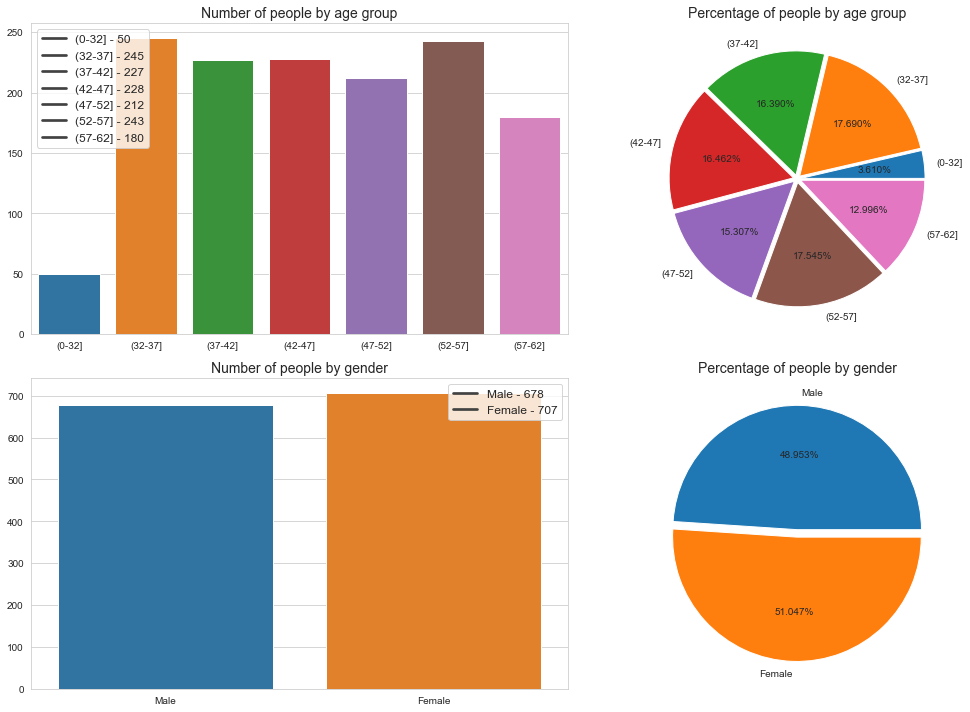

In [13]:
# graficki prikaz rasporeda po godinama i polovima
dataframe_stats = prepare_dataset(stats=True)

sns.set_style('whitegrid')
fig1, axs1 = plt.subplots(2, 2, figsize=(15, 10), num='Age and gender stats')

sns.barplot(ax=axs1[0, 0], y=dataframe_stats.groupby('Age')['Age'].size().to_list(),
            x=sorted(dataframe_stats['Age'].unique()))
axs1[0, 0].set_title('Number of people by age group', fontsize=14)
axs1[0, 0].legend(fontsize='large', labels=[f'{sym} - {num}' for sym, num in
                          zip(sorted(dataframe_stats['Age'].unique()),
                              dataframe_stats.groupby('Age')['Age'].size().to_list())])
axs1[0, 1].pie(dataframe_stats.groupby('Age')['Age'].size().to_list(), autopct='%1.3f%%',
               labels=sorted(dataframe_stats['Age'].unique()), explode=[0.03] * 7)
axs1[0, 1].set_title('Percentage of people by age group', fontsize=14)

sns.barplot(ax=axs1[1, 0], y=dataframe_stats.groupby('Gender')['Gender'].size().to_list(),
            x=(dataframe_stats['Gender'].unique()))
axs1[1, 0].set_title('Number of people by gender', fontsize=14)
axs1[1, 0].legend(fontsize='large', labels=[f'{sym} - {num}' for sym, num in
                          zip(dataframe_stats['Gender'].unique(),
                              dataframe_stats.groupby('Gender')['Gender'].size().to_list())])
axs1[1, 1].pie(dataframe_stats.groupby('Gender')['Gender'].size().to_list(), autopct='%1.3f%%',
               labels=dataframe_stats['Gender'].unique(), explode=[0.03] * 2)
axs1[1, 1].set_title('Percentage of people by gender', fontsize=14)

fig1.tight_layout()

Sa grafova se primecuje da je raspored ljudi po grupama godina i polovima priblizno <b>jednak</b>. Manji procenat ljudi sa 0 do 32 godine opravdan je nepostojanjem osoba mladjih od 32 godine u setu podataka, tako da interval zapravo obuhvata samo ljude koji imaju 32 godine, dok malo manji procenat nastarije grupe ne obuhvata osobe sa 62 godine. Zena je neznatno vise nego muskaraca.

Grupisanjem ljudi prema broju i tipu simptoma koje imaju takodje se uvidja normalna raspodela. Broj osoba koji <b>nema simptome</b> je 8, dok je broj osoba sa <b>svim simptomima</b> 12.

In [14]:
dataframe_stats.groupby(['Fever', 'Nausea/Vomting', 'Headache', 'Diarrhea',
                                   'Fatigue & generalized bone ache', 'Jaundice', 'Epigastric pain']).size()

Fever    Nausea/Vomting  Headache  Diarrhea  Fatigue & generalized bone ache  Jaundice  Epigastric pain
Absent   Absent          Absent    Absent    Absent                           Absent    Absent              8
                                                                                        Present            10
                                                                              Present   Absent              6
                                                                                        Present            11
                                             Present                          Absent    Absent              8
                                                                                                           ..
Present  Present         Present   Present   Absent                           Present   Present            10
                                             Present                          Absent    Absent              5
                

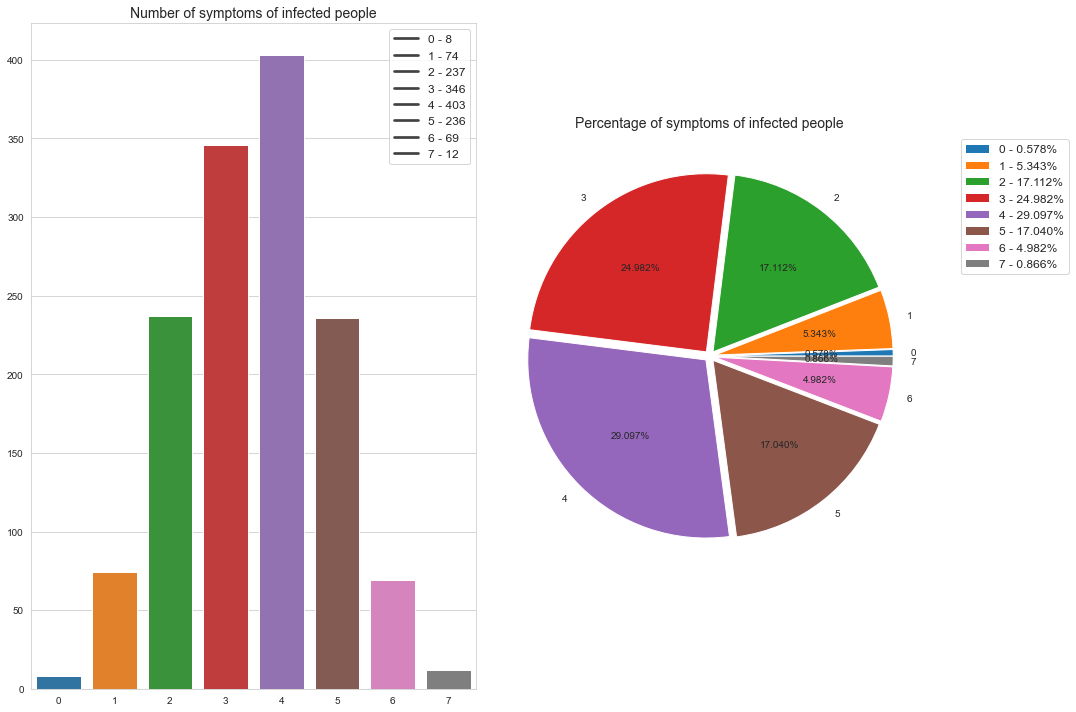

In [15]:
# graficki prikaz broja simptoma
symptoms = dataframe[dataframe.columns[3:10]].to_numpy()
sums = []
for row in symptoms:
    sums.append(np.sum(row))
unique, counts = np.unique(sums, return_counts=True)

fig2, axs2 = plt.subplots(1, 2, figsize=(15, 10), num='Symptoms stats')
sns.barplot(ax=axs2[0], x=unique, y=counts)
axs2[0].set_title('Number of symptoms of infected people', fontsize=14)
axs2[0].legend(fontsize='large', labels=[f'{sym} - {num}' for sym, num in zip(unique, counts)])
axs2[1].pie(counts, explode=[0.03]*8, labels=unique, autopct='%1.3f%%')
axs2[1].set_title('Percentage of symptoms of infected people', fontsize=14)
axs2[1].legend(fontsize='large', bbox_to_anchor=(1.05, 1), labels=[f'{sym} - {num/sum(counts)*100:.3f}%' for sym, num in zip(unique, counts)])

fig2.tight_layout()

Sa grafova se primecuje izrazena <b>normalna raspodela</b> po broju simptoma sa prosekom blizu 3,5 simptoma, kao i da vise od polovine osoba ima 3 ili 4 simptoma, dok 2-5 simptoma ima skoro 90% osoba.

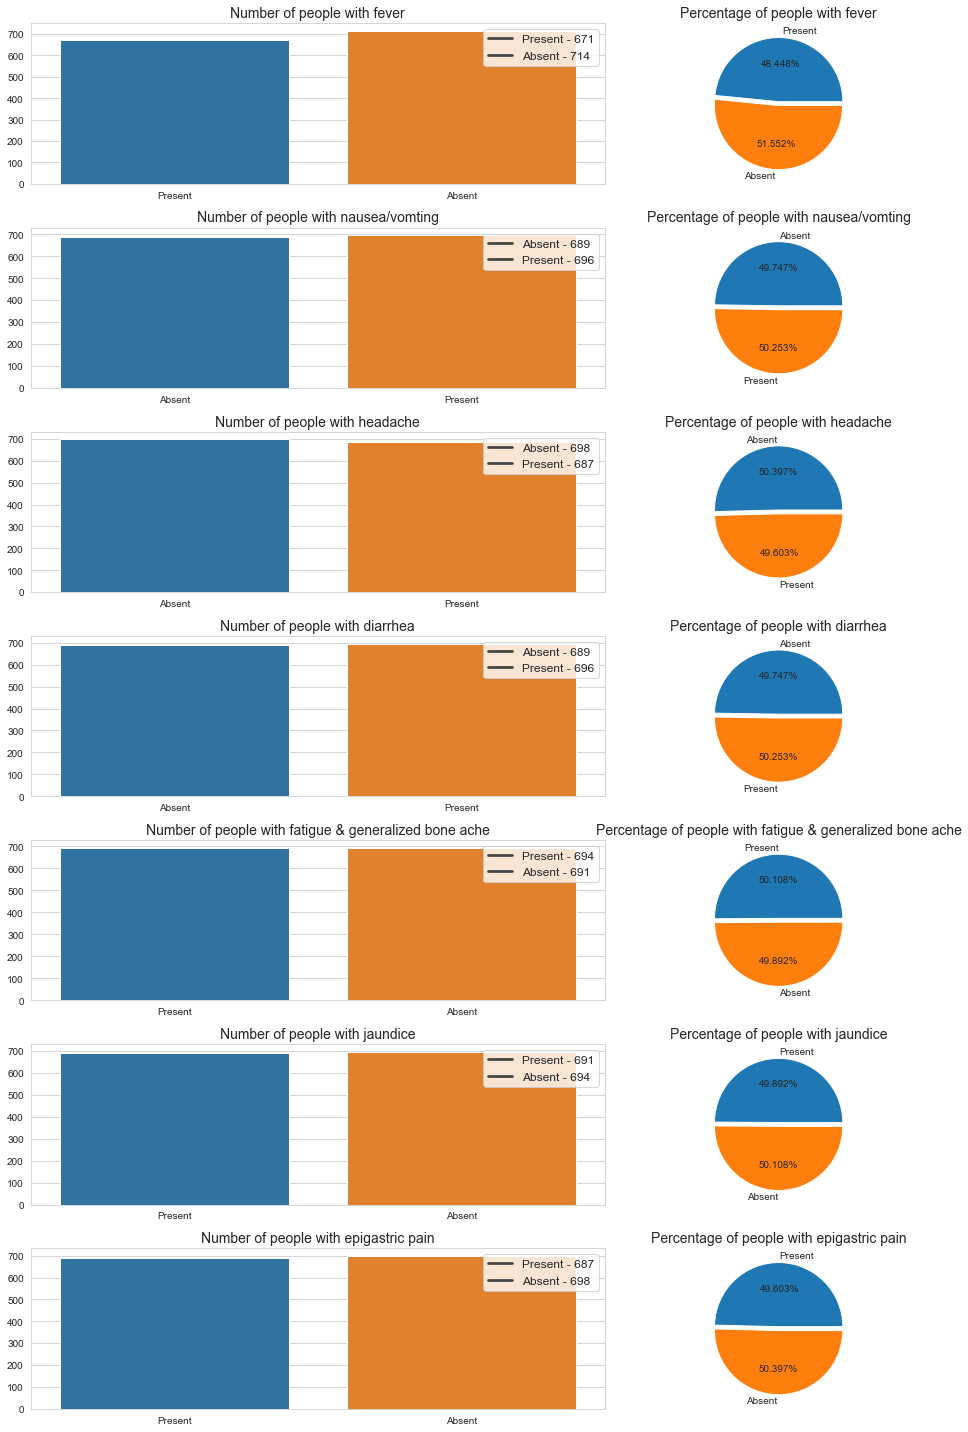

In [16]:
# broj i procenat ljudi sa simptomima
sns.set_style('whitegrid')
fig3, axs3 = plt.subplots(7, 2, figsize=(15, 20), num='Infection stats')

j = 0
for i in range(3,10):
    sns.barplot(ax=axs3[j, 0], y=dataframe_stats.groupby(dataframe_stats.columns[i])[dataframe_stats.columns[i]].size().to_list(),
                x=(dataframe_stats[dataframe_stats.columns[i]].unique()))
    axs3[j, 0].set_title(f'Number of people with {dataframe_stats.columns[i].lower()}', fontsize=14)
    axs3[j, 0].legend(fontsize='large', labels=[f'{sym} - {num}' for sym, num in
                              zip(dataframe_stats[dataframe_stats.columns[i]].unique(),
                                  dataframe_stats.groupby(dataframe_stats.columns[i])[dataframe_stats.columns[i]].size().to_list())])
    axs3[j, 1].pie(dataframe_stats.groupby(dataframe_stats.columns[i])[dataframe_stats.columns[i]].size().to_list(), autopct='%1.3f%%',
                   labels=dataframe_stats[dataframe_stats.columns[i]].unique(), explode=[0.03] * 2)
    axs3[j, 1].set_title(f'Percentage of people with {dataframe_stats.columns[i].lower()}', fontsize=14)
    j += 1

fig3.tight_layout()

Iz grafova se za svaki simptom primecuje <b>jednak</b> broj ljudi koji imaju i koji nemaju simptome.

In [17]:
# detekcija ekstema
outlier_detector = EllipticEnvelope(contamination=.1)
temp = original.to_numpy()
temp = temp.reshape(-1, 1)
outlier_detector.fit(temp)
outliers = outlier_detector.predict(temp)
outlier_detector.predict(temp)

array([1, 1, 1, ..., 1, 1, 1])

In [18]:
# broj ekstremnih vrednosti
count = 0
for i in outliers:
    if i == -1:
        count += 1
print(f'{count} ekstrema od {len(outliers)} vrednosti ({len(outliers) / count:.5f}%)')

4017 ekstrema od 40165 vrednosti (9.99876%)


Broj ekstremnih vrednosti prisutnih u okviru seta podataka ne premasuje 10% i ne utice na ishod ucenja, tako da su ekstremne vrednosti ostavljene radi realnijeg prikaza stanja. Primer ekstremnih vrednosti u setu jesu osobe koje imaju 32 godine.

Text(0.5, 1.0, 'Correlation Heatmap')

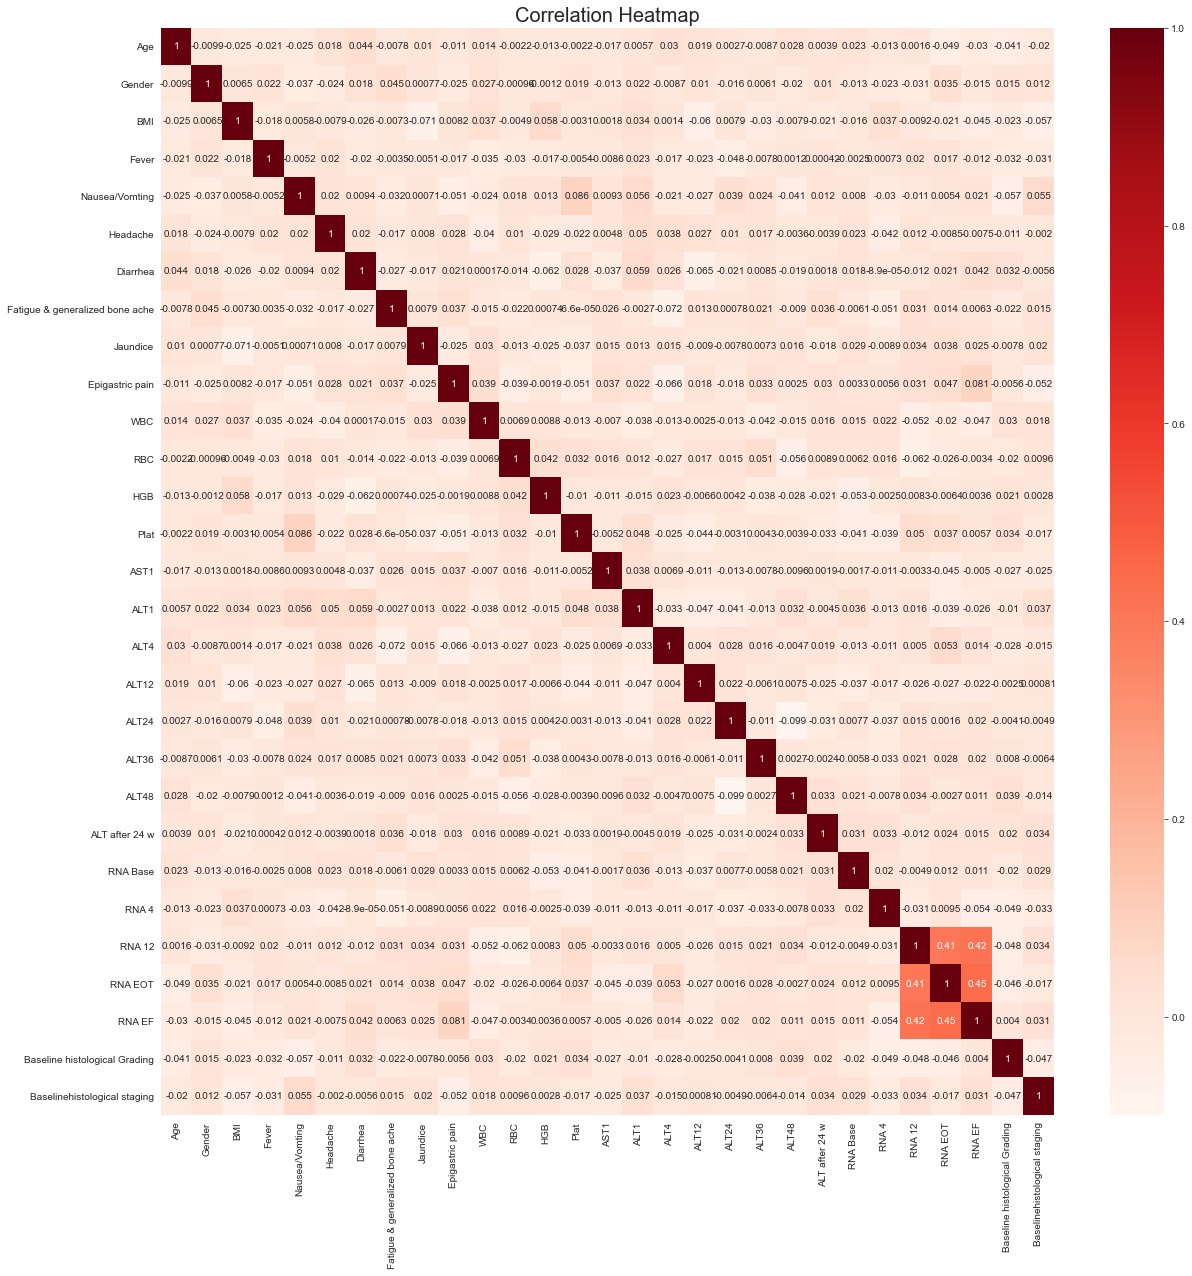

In [19]:
# korelacija izmedju atributa
corr_matrix = original.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

Iz mape korelacije se uvidja osnovni problem rada sa ovim setom podataka - ne postoji <b>skoro nikakva</b> korelacija izmedju karakteristika, sto takodje pokazuju podaci o velikom broju jednako rasporedjenih vrednosti.

Priprema podataka za rad se sastoji u rasporedjivanju vrednosti u intervale i prekodiranju vrednosti odredjenih kolona u binarne.

In [20]:
# pripremljeni podaci koji ce biti korisceni za rad
dataframe

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT4,ALT12,ALT24,ALT36,ALT48,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF
0,5,0,4,1,0,0,0,1,1,1,...,2,2,2,0,0,1,1,1,0,0
1,3,0,2,0,1,1,0,1,1,0,...,2,2,2,2,2,1,1,1,1,1
2,5,0,3,1,1,1,1,0,0,0,...,2,2,2,0,0,1,1,0,1,1
3,4,1,3,0,1,0,1,0,1,0,...,2,2,2,2,2,1,1,1,1,1
4,6,0,3,0,0,1,0,1,1,1,...,2,2,2,2,2,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,3,0,2,0,1,1,1,0,0,0,...,2,2,2,2,2,1,1,0,0,0
1381,5,0,3,0,1,1,0,0,0,0,...,2,2,2,2,2,1,1,1,1,1
1382,2,0,2,1,1,0,0,0,1,0,...,2,2,2,2,1,1,1,1,1,1
1383,4,0,2,1,0,0,1,1,1,0,...,2,2,2,2,2,1,1,1,1,1


In [21]:
# ukratko statistika
dataframe.describe()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT4,ALT12,ALT24,ALT36,ALT48,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,...,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.0,1385.000000,1385.000000,1385.000000,1385.000000
mean,3.267870,0.489531,2.293141,0.515523,0.502527,0.496029,0.502527,0.498917,0.501083,0.503971,...,1.976895,1.975451,1.976173,1.970397,1.976895,1.0,0.999278,0.722022,0.722744,0.724188
std,1.775235,0.500071,0.890292,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,...,0.150290,0.154801,0.152564,0.181886,0.164081,0.0,0.026870,0.448164,0.447806,0.447084
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,1.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,1.000000,1.000000,1.000000,1.000000
75%,5.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,1.000000,1.000000,1.000000,1.000000
max,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

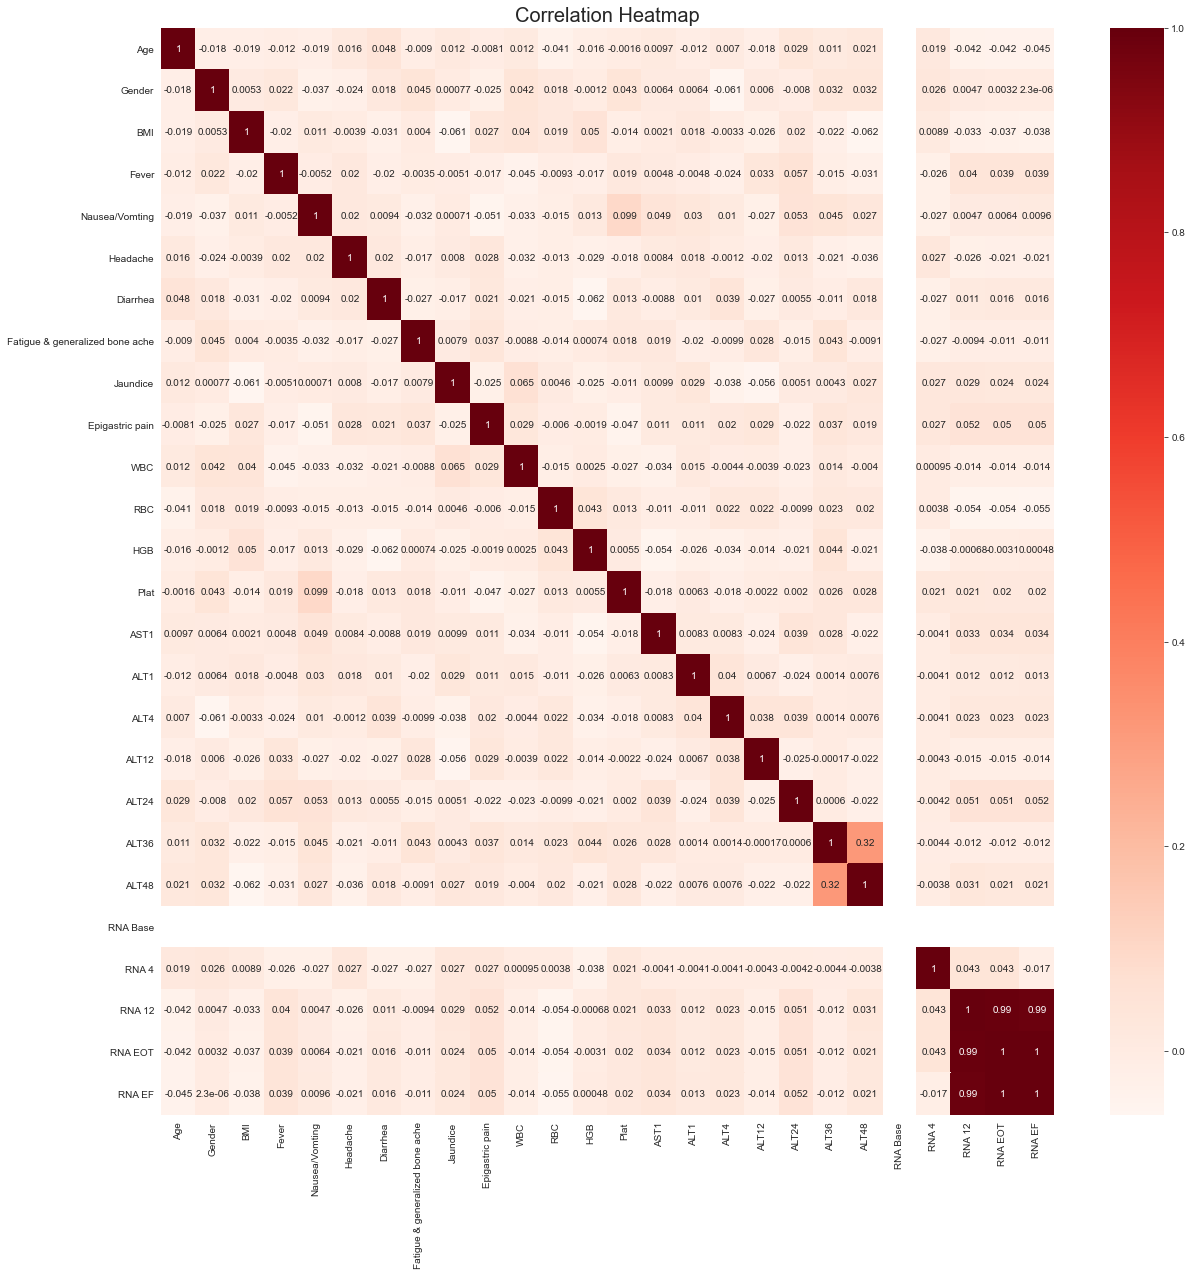

In [22]:
# korelacija izmedju atributa nakon pripreme
corr_matrix = dataframe.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

Cak i nakon pripreme podataka ne postoji korelacija izmedju karakteristika. Korelacija od 1 ili blizu 1 takodje nije pogodna za ucenje.

## Klasifikacija: binarna klasifikacija prema polu, multiklasna klasifikacija prema godinama

In [23]:
# osnovna ocena klasifikacije po polu i godinama
def base_classifier(column, test=0.2):
    x = dataframe.drop(columns=[column])
    y = dataframe[column]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test, random_state=0)
    dummy = DummyClassifier(strategy='uniform', random_state=1)
    dummy.fit(x_train, y_train)
    return dummy.score(x_test, y_test)

print(f'Pol {base_classifier("Gender")}, godine {base_classifier("Age")}')

Pol 0.48375451263537905, godine 0.12274368231046931


### Logisticka regresija

In [24]:
# odabir najboljeg modela iscrpnom pretragom, logisticka regresija
def select_model_exhaustive(column, classifier):
    x = dataframe.drop(columns=[column])
    y = dataframe[column]
    classificator = classifier
    penalty = ['l1', 'l2']
    c = np.logspace(0, 4, 10)
    hyperparameters = dict(C=c, penalty=penalty)
    gridsearch = GridSearchCV(classificator, hyperparameters, cv=5, verbose=0, n_jobs=-1)
    best_model = gridsearch.fit(x, y)
    print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
    print('Best C:', best_model.best_estimator_.get_params()['C'])
    print(cross_val_score(gridsearch, x, y).mean())
    
select_model_exhaustive('Gender', LogisticRegression(max_iter=5000))

Best Penalty: l2
Best C: 1.0
0.5046931407942238


In [25]:
# odabir najboljeg modela nasumicnom pretragom, logisticka regresija
def select_model_random(column, classifier):
    x = dataframe.drop(columns=[column])
    y = dataframe[column]
    classificator = classifier
    penalty = ['l1', 'l2']
    c = uniform(loc=0, scale=4)  # .rvs(10)
    hyperparameters = dict(C=c, penalty=penalty)
    randomizedsearch = RandomizedSearchCV(classificator, hyperparameters, random_state=1,
                                          n_iter=100, cv=5, verbose=0, n_jobs=-1)
    best_model = randomizedsearch.fit(x, y)
    print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
    print('Best C:', best_model.best_estimator_.get_params()['C'])
    print(cross_val_score(randomizedsearch, x, y).mean())
    
select_model_random('Gender', LogisticRegression(max_iter=5000))

Best Penalty: l2
Best C: 0.07952053535918235
0.5097472924187725


In [26]:
# logisticka regresija sa standardizacijom
def logistic_regression(column, multi_class='auto', penalty='l2', c=10):
    x = dataframe.drop(columns=[column])
    y = dataframe[column]
    scaler = StandardScaler()
    x_std = scaler.fit_transform(x)
    logit = LogisticRegression(random_state=0, multi_class=multi_class, penalty=penalty, C=c, max_iter=5000)  # ovr, multinomial,
    model = logit.fit(x_std, y)
    return cross_val_score(model, x, y).mean()
    
print(f'Pol: {logistic_regression("Gender")}, godine: {logistic_regression("Age", multi_class="ovr")}')

Pol: 0.5025270758122743, godine: 0.15018050541516245


In [27]:
# evaluacija binarnog klasifikatora
def binary_evaluation(column, classifier):
    x = dataframe.drop(columns=[column])
    y = dataframe[column]
    classification = classifier
    print(f'Accuracy:  {cross_val_score(classification, x, y, scoring="accuracy")}')
    print(f'Precision: {cross_val_score(classification, x, y, scoring="precision")}')
    print(f'Recall:    {cross_val_score(classification, x, y, scoring="recall")}')
    print(f'F1 Score:  {cross_val_score(classification, x, y, scoring="f1")}')
    
binary_evaluation('Gender', LogisticRegression(max_iter=5000))

Accuracy:  [0.51624549 0.46931408 0.5198556  0.49819495 0.53068592]
Precision: [0.50381679 0.45588235 0.51327434 0.48571429 0.52586207]
Recall:    [0.48888889 0.45925926 0.42647059 0.375      0.44852941]
F1 Score:  [0.4962406  0.45756458 0.46586345 0.42323651 0.48412698]


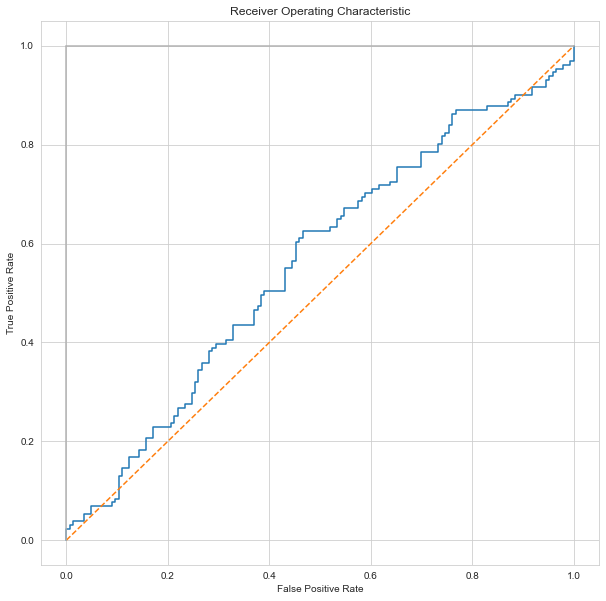

[[0.51464314 0.48535686]]
[0 1]
Threshold:            0.4328932044537196
True Positive Rate:   0.916030534351145
False Positive Rate:  0.9178082191780822
Threshold:            0.5178892404731555
True Positive Rate:   0.3816793893129771
False Positive Rate:  0.2876712328767123
0.5600752901809056


In [28]:
# vizuelizacija praga binarnog klasifikatora
def binary_threshold(column, classifier, test=0.2):
    x = dataframe.drop(columns=[column])
    y = dataframe[column]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test, random_state=1)
    classification = classifier
    classification.fit(x_train, y_train)
    y_probabilities = classification.predict_proba(x_test)[:, 1]
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_probabilities)
    plt.figure(figsize=(10,10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    print(classification.predict_proba(x_test)[0:1])
    print(classification.classes_)

    print("Threshold:           ", threshold[116])
    print("True Positive Rate:  ", true_positive_rate[116])
    print("False Positive Rate: ", false_positive_rate[116])

    print("Threshold:           ", threshold[45])
    print("True Positive Rate:  ", true_positive_rate[45])
    print("False Positive Rate: ", false_positive_rate[45])

    print(roc_auc_score(y_test, y_probabilities))
    
binary_threshold('Gender', LogisticRegression(max_iter=5000))

Rezultati sa grafika prikazuju da binarni klasifikator nije previse bolji od <b>nasumicnog</b> dodeljivanja klasa.

In [29]:
# multiklasna evaluacija
def multiclass_evaluation(column, classifier):
    x = dataframe.drop(columns=[column])
    y = dataframe[column]
    classification = classifier
    print(f'Accuracy:             {cross_val_score(classification, x, y, scoring="accuracy")}')
    print(f'F1 Score (macro):     {cross_val_score(classification, x, y, scoring="f1_macro")}')
    print(f'F1 Score (micro):     {cross_val_score(classification, x, y, scoring="f1_micro")}')
    print(f'F1 Score (weighted):  {cross_val_score(classification, x, y, scoring="f1_weighted")}')
    
multiclass_evaluation('Age', LogisticRegression(max_iter=5000, multi_class='ovr'))

Accuracy:             [0.19133574 0.16606498 0.13718412 0.14079422 0.1299639 ]
F1 Score (macro):     [0.14676219 0.12544628 0.10488902 0.11221502 0.09741176]
F1 Score (micro):     [0.19133574 0.16606498 0.13718412 0.14079422 0.1299639 ]
F1 Score (weighted):  [0.17246028 0.14773356 0.12298873 0.12961385 0.1147947 ]


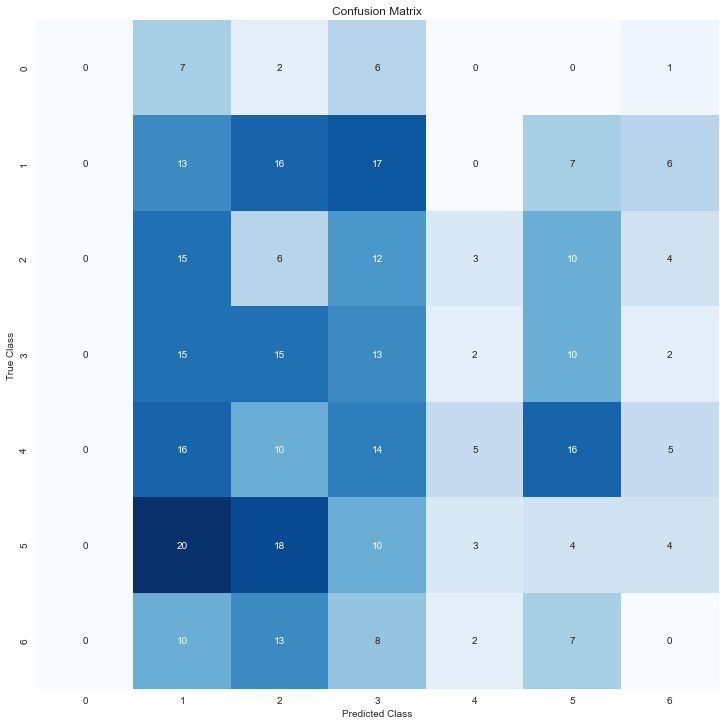

In [30]:
# vizuelizacija multiklasne klasifikacije
def multiclass_visualisation(column, classifier):
    x = dataframe.drop(columns=[column])
    y = dataframe[column]
    class_names = dataframe[column].unique().sort()
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
    classifier = classifier
    y_predicted = classifier.fit(x_train, y_train).predict(x_test)
    matrix = confusion_matrix(y_test, y_predicted)
    df = pd.DataFrame(matrix, index=class_names, columns=class_names)
    plt.figure(figsize=(10,10))
    sns.heatmap(df, annot=True, cbar=None, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    
multiclass_visualisation('Age', LogisticRegression(max_iter=5000, multi_class='ovr'))

Matrica konfuzije pokazuje slicne rezultate: vecina klasa je dodeljena <b>nasumicno</b>.

In [31]:
# odabir najboljeg modela sa preprocesiranjem
def select_model_with_preprocessing(column):
    x = dataframe.drop(columns=[column])
    y = dataframe[column]
    preprocess = FeatureUnion([('std', StandardScaler()), ('pca', PCA())])
    pipe = Pipeline([('preprocess', preprocess), ('classifier', LogisticRegression(solver='saga', max_iter=5000))])
    search_space = [{'preprocess__pca__n_components': [1, 2, 3],
                     'classifier__penalty': ['l1', 'l2'],
                     'classifier__C': np.logspace(0, 4, 10)}]
    clf = GridSearchCV(pipe, search_space, cv=5, verbose=0, n_jobs=-1)
    best_model = clf.fit(x, y)
    print(best_model.best_estimator_.get_params()['preprocess__pca__n_components'])
    print(cross_val_score(clf, x, y).mean())
    
select_model_with_preprocessing('Gender')

1
0.503971119133574


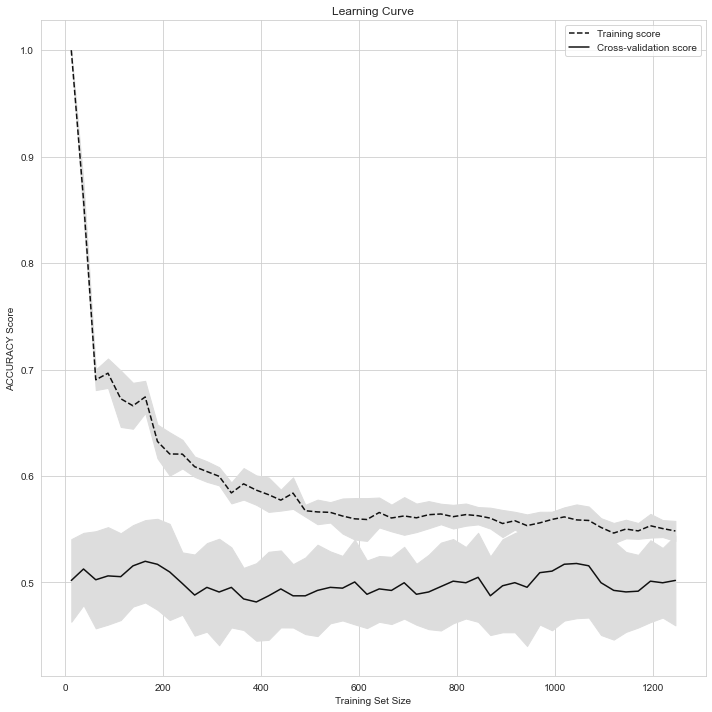

In [32]:
# vizuelizacija uticaja velicine trening seta na preciznost
def training_size_visualisation(column, classifier, score='accuracy'):
    x = dataframe.drop(columns=[column])
    y = dataframe[column]
    train_sizes, train_scores, test_scores = learning_curve(classifier, x, y, cv=10,
                                                            scoring=score, n_jobs=-1,
                                                            train_sizes=np.linspace(0.01, 1.0, 50))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.figure(figsize=(10,10))
    plt.plot(train_sizes, train_mean, '--', color='#111111', label='Training score')
    plt.plot(train_sizes, test_mean, color='#111111', label='Cross-validation score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='#DDDDDD')
    plt.title('Learning Curve')
    plt.xlabel('Training Set Size')
    plt.ylabel(f'{score.upper()} Score')
    plt.legend(loc='best')
    plt.tight_layout()

training_size_visualisation('Gender', LogisticRegression(max_iter=5000))    

Sa grafika se primecuje da velicina trening seta <b>ne utice</b> znacajnije na ishod ucenja i ostaje blizu 0.5 (nasumicno biranje).

### Stabla odlucivanja i RandomForest

In [33]:
# pomocna klasa za vizuelizaciju
def _decision_tree_visualisation(column, x, classifier):
    dot_data = tree.export_graphviz(classifier, out_file=None, feature_names=x.columns, class_names=column)
    graph = pydotplus.graph_from_dot_data(dot_data)
    Image(graph.create_png())

In [34]:
# stablo odluke
def decision_tree_classifier(column, criterion='gini', visual=False):
    x = dataframe.drop(columns=[column])
    y = dataframe[column]
    decisiontree = DecisionTreeClassifier(random_state=0, criterion=criterion)
    model = decisiontree.fit(x, y)
    print(cross_val_score(model, x, y).mean())

    if visual:
        _decision_tree_visualisation(column, x, decisiontree)
        
decision_tree_classifier('Gender')

0.5018050541516246


In [35]:
# 'nasumicna suma' klasifikator sa opcijama za vizuelizaciju, adaboost, prikaz najbitnijih karakteristika
def random_forest_classifier(column, criterion='gini', important=False, select=False, boost=False, oob=False):
    x = dataframe.drop(columns=[column])
    y = dataframe[column]

    if boost:
        classifier = AdaBoostClassifier(random_state=0)  # base_estimator, n_estimators, learning_rate, loss
        model = classifier.fit(x, y)
    else:
        # random_state=0, max_depth=None, min_samples_split=2, min_samples_leaf=1,
        # min_weight_fraction_leaf=0, max_leaf_nodes=None, min_impurity_decrease=0
        # max_features, bootstrap, n_estimators
        if oob:
            classifier = RandomForestClassifier(random_state=0, n_estimators=1000, oob_score=True, n_jobs=-1)
            model = classifier.fit(x, y)
            print(f'Out of Bag Error score: {classifier.oob_score_}')
        else:
            classifier = RandomForestClassifier(random_state=0, n_jobs=-1, criterion=criterion)
            model = classifier.fit(x, y)

    if select:
        selector = SelectFromModel(classifier, threshold=0.1)
        features_important = selector.fit_transform(x, y)
        model = classifier.fit(features_important, y)
        print(model.feature_importances_)
        
    if important:
        _show_important_features(x, model)

        
    print(cross_val_score(model, x, y).mean())

In [36]:
# pomocna klasa za prikaz najbitnijih karakteristika
def _show_important_features(x, model):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    names = x.columns
    plt.figure(figsize=(10, 10))
    plt.title('Feature Importance')
    plt.bar(range(x.shape[1]), importances[indices])
    plt.xticks(range(x.shape[1]), names, rotation=90)
    plt.tight_layout()
    print(model.feature_importances_)

In [37]:
# klasifikacija sumom za pol
random_forest_classifier('Gender')

0.5198555956678701


In [38]:
# klasifikacija sumom za godine
random_forest_classifier('Age')

0.17978339350180503


[0.15817224 0.10026849 0.04939787 0.04784326 0.04908047 0.04805
 0.04280916 0.05481857 0.05165891 0.06051807 0.009962   0.14717903
 0.06769882 0.01038622 0.01011345 0.00996281 0.01014639 0.00957034
 0.01002177 0.00857694 0.         0.00032394 0.0147462  0.0139024
 0.01479269]
0.5198555956678701


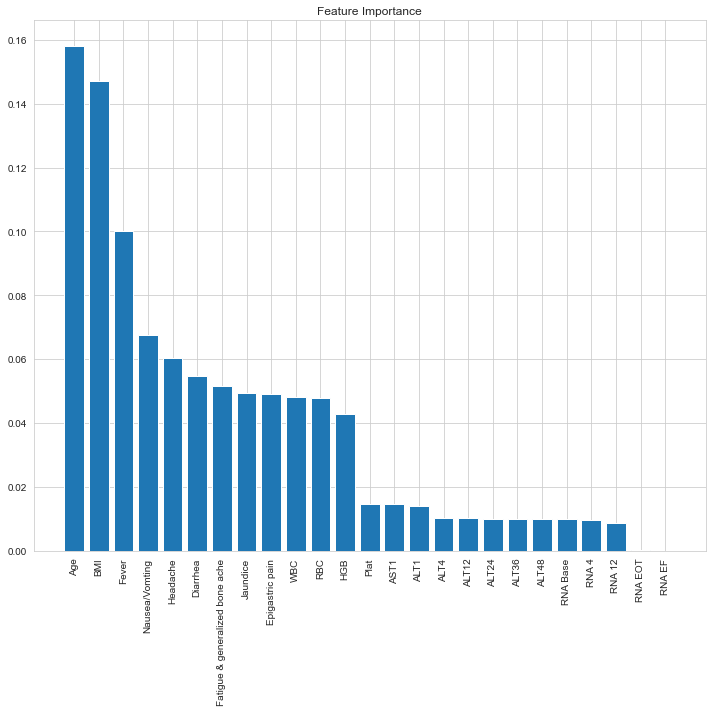

In [39]:
# klasifikacija sumom za pol uz prikaz najbitnijih karakteristika
random_forest_classifier('Gender', important=True)

Sa grafika se primecuje najveci uticaj karakteristika koje su <b>po redosledu</b> prve u setu podataka. Vecina karakteristika ima slican, ali takodje i beznacajan utican na ishod klasifikacije.

[0.06417223 0.1046254  0.05537138 0.05658407 0.05404203 0.05825414
 0.05811902 0.05428711 0.06725136 0.06649631 0.00815779 0.162263
 0.08169194 0.00949479 0.00847098 0.00884629 0.01041993 0.00808981
 0.01049296 0.00884761 0.         0.00042531 0.0152088  0.01416039
 0.01422735]
0.17978339350180503


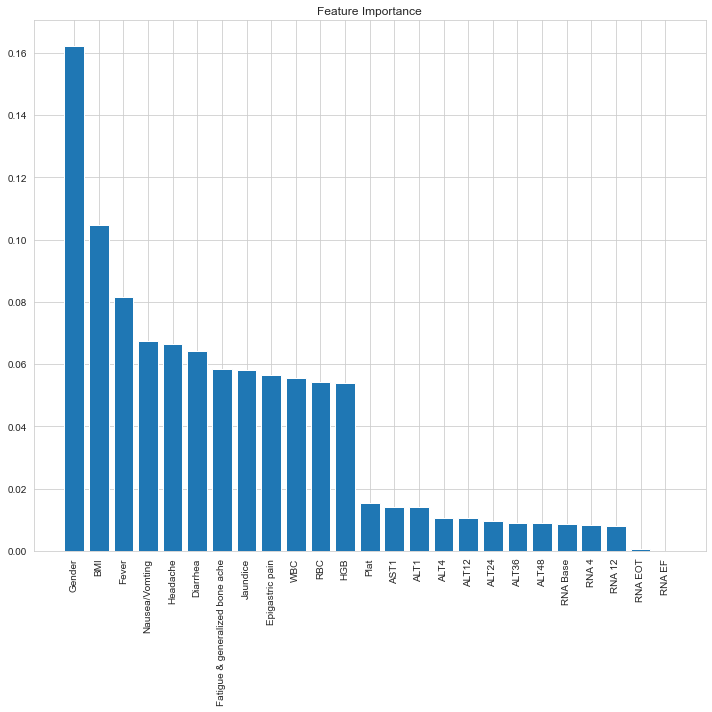

In [40]:
# klasifikacija sumom za godine uz prikaz najbitnijih karakteristika
random_forest_classifier('Age', important=True)

Slicno kao sa prethodnog grafika, i multiklasna klasifikacija najvise zavisi od karakteristika po redosledu.

In [41]:
# klasifikacija sumom za pol uz odabir najbitnijih karakteristika
random_forest_classifier('Gender', select=True)

[0.43731918 0.19652906 0.36615176]
0.5198555956678701


In [42]:
# klasifikacija sumom za godine uz odabir najbitnijih karakteristika
random_forest_classifier('Age', select=True)

[0.36735693 0.63264307]
0.17978339350180503


Kreiranjem klasifikatora uz odabir najvaznijih karakteristika primecuje se da su pri <b>binarnoj klasifikaciji</b> na odlucivanje uticale <b>3</b> karakteristike, dok su na <b>multiklasnu klasifikaciju</b> uticale samo <b>2</b> karakteristike, od <b>ukupno 26</b>.

[0.1  0.1  0.02 0.04 0.02 0.04 0.02 0.02 0.02 0.06 0.04 0.26 0.06 0.02
 0.02 0.04 0.02 0.   0.02 0.04 0.   0.02 0.02 0.   0.  ]
0.4859205776173285


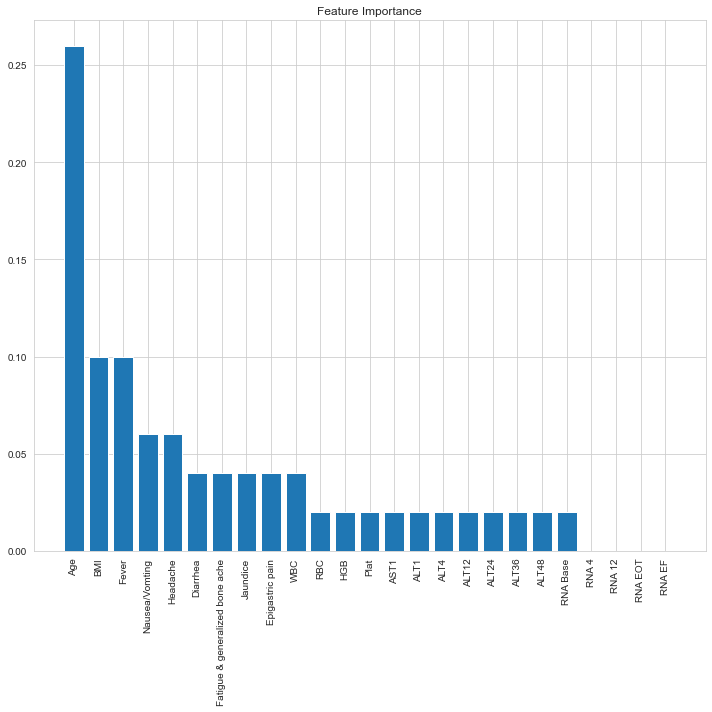

In [43]:
# klasifikacija AdaBoost-om za pol uz prikaz najbitnijih karakteristika
random_forest_classifier('Gender', important=True, boost=True)

[0.02 0.1  0.04 0.04 0.04 0.04 0.02 0.02 0.02 0.1  0.02 0.18 0.08 0.04
 0.02 0.02 0.02 0.02 0.06 0.04 0.   0.02 0.   0.02 0.02]
0.15884476534296027


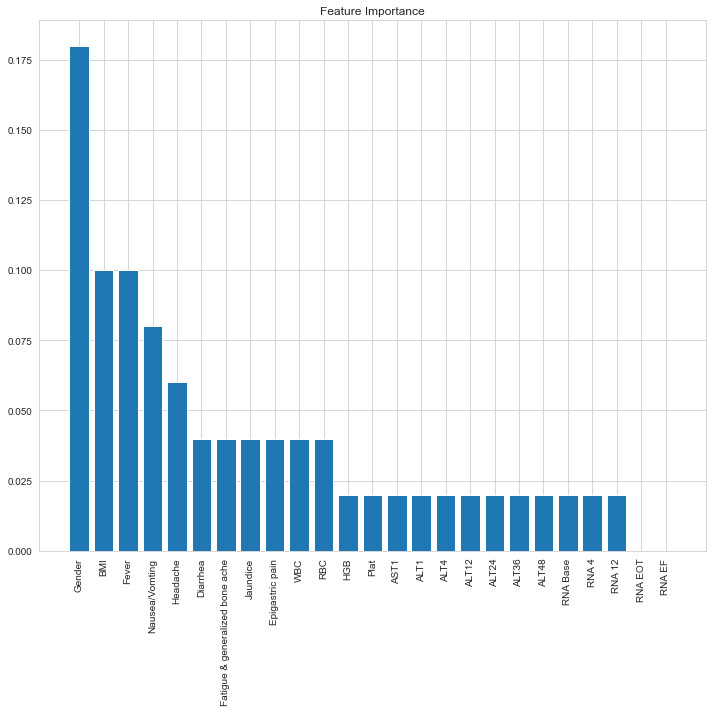

In [44]:
# klasifikacija AdaBoost-om za godine uz prikaz najbitnijih karakteristika
random_forest_classifier('Age', important=True, boost=True)

Koriscenjem <b>AdaBoost</b> klasifikatora primecuje se jos izrazeniji uticaj <b>jedne</b> karakteristike na klasifikaciju, dok su mnoge <b>izjednacene</b> po uticaju.

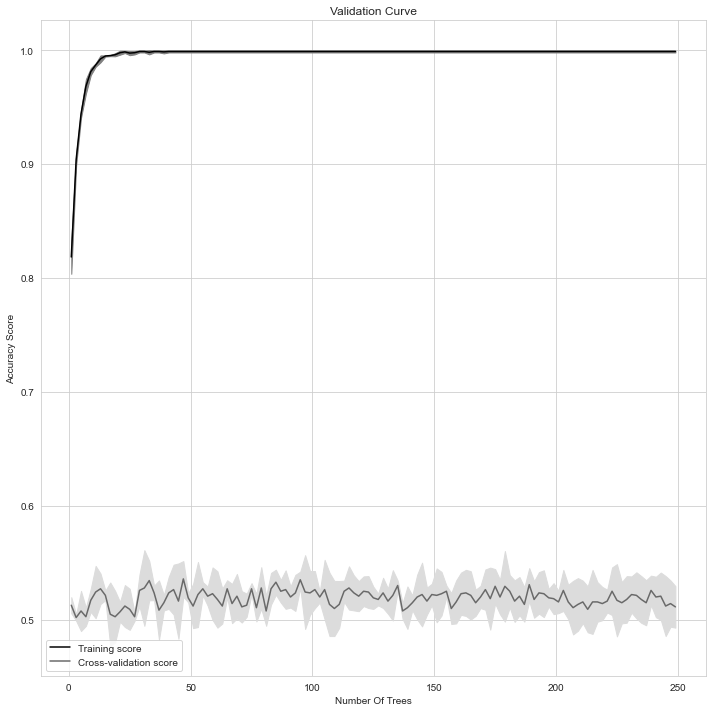

In [45]:
# vizuelizacija uticaja parametara kod sume (default)
def hyperparameters_visualisation(column, classifier=RandomForestClassifier(), param='n_estimators', score='accuracy'):
    x = dataframe.drop(columns=[column])
    y = dataframe[column]
    param_range = np.arange(1, 250, 2)
    train_scores, test_scores = validation_curve(classifier, x, y, param_name=param,
                                                 param_range=param_range, cv=3, scoring=score, n_jobs=-1)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.figure(figsize=(10, 10))
    plt.plot(param_range, train_mean, label='Training score', color='black')
    plt.plot(param_range, test_mean, label='Cross-validation score', color='dimgrey')
    plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color='gray')
    plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color='gainsboro')
    plt.title('Validation Curve')
    plt.xlabel('Number Of Trees')
    plt.ylabel('Accuracy Score')
    plt.tight_layout()
    plt.legend(loc='best')

hyperparameters_visualisation('Gender')

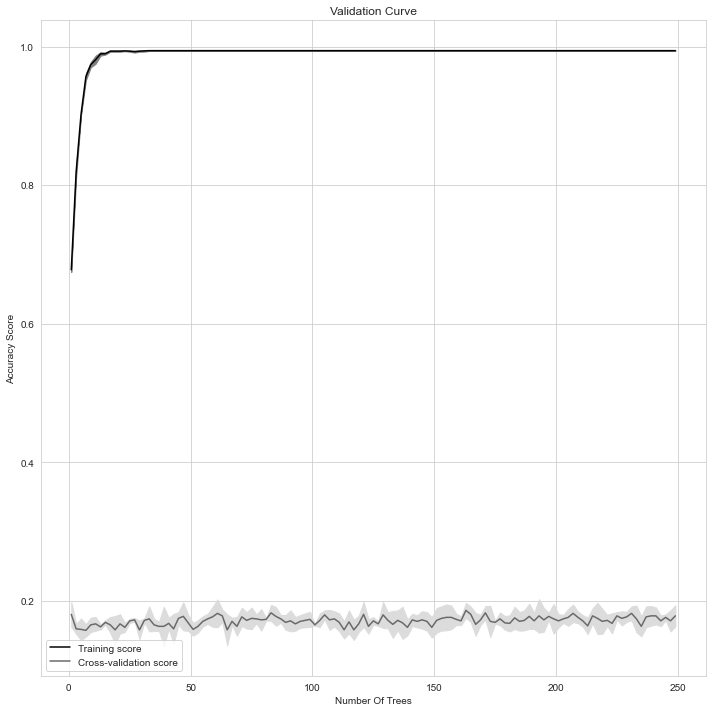

In [46]:
hyperparameters_visualisation('Age')

Kao i kod logisticke regresije, promena parametara klasifikatora <b>ne utice</b> znacajnije na poboljsanje klasifikacije. I binarna i multiklasna klasifikacija prikazuju <b>jednake sanse</b> za izbor svake od klasa, tako da se moze reci da je odlucivanje blizu <b>nasumicnom</b>.

### Logisticka regresija vs. RandomForest

Cak i pri iscrpnom trazenju najboljeg modela izmedju vise klasifikatora, ne dolazi se do znacajnijeg dobitka u tacnosti predvidjanja. I za binarnu i za multiklasnu klasifikaciju se <b>RandomForest</b> pokazao kao bolji klasifikator, ali razlika je <b>neznatna</b>.

In [47]:
# odabir izmedju vise modela (LogisticRegression i RandomForestClassifier)
def select_model_multiple_algorithms(column):
    x = dataframe.drop(columns=[column])
    y = dataframe[column]
    pipe = Pipeline([('classifier', RandomForestClassifier())])
    search_space = [{'classifier': [LogisticRegression(max_iter=5000, solver='saga')],
                     'classifier__penalty': ['l1', 'l2'],
                     'classifier__C': np.logspace(0, 4, 10)},
                    {'classifier': [RandomForestClassifier()],
                     'classifier__n_estimators': [10, 100, 1000],
                     'classifier__max_features': [1, 2, 3]}]
    gridsearch = GridSearchCV(pipe, search_space, cv=5, verbose=0, n_jobs=-1)
    best_model = gridsearch.fit(x, y)
    print(best_model.best_estimator_.get_params())
    print(cross_val_score(gridsearch, x, y).mean())
    
select_model_multiple_algorithms('Gender')

{'memory': None, 'steps': [('classifier', RandomForestClassifier(max_features=3))], 'verbose': False, 'classifier': RandomForestClassifier(max_features=3), 'classifier__bootstrap': True, 'classifier__ccp_alpha': 0.0, 'classifier__class_weight': None, 'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__max_features': 3, 'classifier__max_leaf_nodes': None, 'classifier__max_samples': None, 'classifier__min_impurity_decrease': 0.0, 'classifier__min_impurity_split': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__min_weight_fraction_leaf': 0.0, 'classifier__n_estimators': 100, 'classifier__n_jobs': None, 'classifier__oob_score': False, 'classifier__random_state': None, 'classifier__verbose': 0, 'classifier__warm_start': False}
0.535740072202166


In [48]:
select_model_multiple_algorithms('Age')

{'memory': None, 'steps': [('classifier', RandomForestClassifier(max_features=1))], 'verbose': False, 'classifier': RandomForestClassifier(max_features=1), 'classifier__bootstrap': True, 'classifier__ccp_alpha': 0.0, 'classifier__class_weight': None, 'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__max_features': 1, 'classifier__max_leaf_nodes': None, 'classifier__max_samples': None, 'classifier__min_impurity_decrease': 0.0, 'classifier__min_impurity_split': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__min_weight_fraction_leaf': 0.0, 'classifier__n_estimators': 100, 'classifier__n_jobs': None, 'classifier__oob_score': False, 'classifier__random_state': None, 'classifier__verbose': 0, 'classifier__warm_start': False}
0.16967509025270758


### K-najblizih suseda

Daje <b>slicne</b> rezultate kao i ostali klasifikatori. Neznatno bolji rezultati kada se koristi <b>oblast</b> trazenja, naspram odredjenog broja najblizih. <b>Najbolji broj suseda</b> koji je pronadjen iscrpnim trazenjem za <b>binarnu klasifikaciju</b> je <b>10</b> (sto je ujedno i maksimalna vrednost koja je bila razmatrana), dok je za <b>multiklasnu klasifikaciju</b> najbolji broj suseda <b>2</b>.

In [49]:
# k najblizih suseda, podrzava oblasti
def knn_classifier(column, neighbors=5, radius=None):
    x = dataframe.drop(columns=[column])
    y = dataframe[column]
    standardizer = StandardScaler()
    x_std = standardizer.fit_transform(x)

    if radius:
        model = RadiusNeighborsClassifier(radius=radius, n_jobs=-1).fit(x_std, y)
    else:
        model = KNeighborsClassifier(n_neighbors=neighbors, n_jobs=-1).fit(x_std, y)

    print(cross_val_score(model, x, y).mean())
    
knn_classifier('Gender')

0.5025270758122744


In [50]:
knn_classifier('Age')

0.15812274368231044


In [51]:
knn_classifier('Gender', radius=5)

0.5039711191335741


In [52]:
knn_classifier('Age', radius=5)

0.17545126353790613


In [53]:
# pronalazenje najboljeg broja suseda
def knn_classifier_best_neighborhood(column):
    x = dataframe.drop(columns=[column])
    y = dataframe[column]
    standardizer = StandardScaler()
    x_std = standardizer.fit_transform(x)
    knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
    pipe = Pipeline([("standardizer", standardizer), ("knn", knn)])
    search_space = [{"knn__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]
    classifier = GridSearchCV(pipe, search_space, cv=5, verbose=0).fit(x_std, y)
    print(classifier.best_estimator_.get_params()["knn__n_neighbors"])
    print(cross_val_score(classifier, x, y).mean())
    
knn_classifier_best_neighborhood('Gender')

10
0.5148014440433213


In [54]:
knn_classifier_best_neighborhood('Age')

2
0.1812274368231047


### Naivni Bajesov klasifikator

Daje losije rezultate nego prethoni klasifikator, ali i dalje priblizno ostalim.

In [55]:
# Bajesov klasifikator sa opcijama
def naive_bayes_classifier(column, priors=None, ver='continuous', proba=False):
    x = dataframe.drop(columns=[column])
    y = dataframe[column]
    if ver == 'discrete':
        classifier = MultinomialNB()
    elif ver == 'binary':
        classifier = BernoulliNB()
    else:
        classifier = GaussianNB(priors=priors)

    model = classifier.fit(x, y)

    if proba:
        classifer_sigmoid = CalibratedClassifierCV(classifier, cv=2, method='sigmoid')
        classifer_sigmoid.fit(x, y)
        print(classifer_sigmoid.predict_proba(x))
        
    print(cross_val_score(model, x, y).mean())
        
naive_bayes_classifier('Gender', ver='discrete', proba=True)

[[0.50902245 0.49097755]
 [0.51522241 0.48477759]
 [0.50662193 0.49337807]
 ...
 [0.51058188 0.48941812]
 [0.51866147 0.48133853]
 [0.50911019 0.49088981]]
0.5054151624548736


In [56]:
naive_bayes_classifier('Age', ver='discrete', proba=True)

[[0.03535729 0.18298753 0.16643661 ... 0.17140613 0.17427533 0.12172022]
 [0.03605904 0.17501926 0.18767184 ... 0.1409141  0.17346785 0.13030125]
 [0.03802053 0.18093754 0.14896692 ... 0.16293733 0.15532471 0.14453533]
 ...
 [0.034417   0.18149191 0.17191529 ... 0.14987972 0.15855471 0.13873159]
 [0.03700832 0.17550096 0.17838712 ... 0.14253882 0.17272651 0.1298768 ]
 [0.04012335 0.18470833 0.169623   ... 0.14468371 0.17835789 0.11699197]]
0.15812274368231044


### Suppor Machine Vector klasifikator

Naizgled daje 'bolje' rezultate (cak i najbolje), ali detaljnim ispitivanjem dobijenog grafika, uvidja se klasifikovanje <b>svih instanci</b> u <b>jednu</b> jedinu <b>klasu</b>, tako da je tacnost predvidjanja odredjena brojem instanci koje pripadaju klasi koja je predvidjena. U ovom slucaju je to klasa 0 sa 0.57, sto znaci da 57 (od 100) instanci pripada negativnoj klasi.

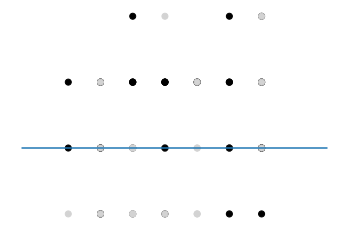

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0.5700000000000001
[[-0.15877684 -0.31448545]
 [ 0.89973541  0.85027548]
 [ 1.42899153  0.85027548]
 [-0.15877684 -1.47924638]
 [-0.15877684  0.85027548]
 [-1.21728909 -1.47924638]
 [-1.21728909 -1.47924638]
 [ 1.42899153  0.85027548]
 [ 0.89973541 -0.31448545]
 [-1.21728909 -0.31448545]
 [-0.68803296 -1.47924638]
 [ 1.42899153  0.85027548]
 [-1.21728909 -0.31448545]
 [-0.68803296 -0.31448545]
 [ 0.89973541 -0.31448545]
 [-1.74654521  0.85027548]
 [ 1.42899153 -1.47924638]
 [-1.21728909 -1.47924638]
 [-0.15877684  0.85027548]
 [-0.15877684  0.85027548]
 [ 0.89973541  0.85027548]
 [-0.68803296  0.85027548]
 [ 1.42899153  0.85027548]
 [-0.15877684 -0.31448545]
 [ 0.37047929  0.85027548]
 [-0.15877684  0.85027548]
 [ 1.42899153 -0.31448545]
 [-1.21728909 -0.31448545]
 [ 1.42899153 -0.3144

In [57]:
def svc_classifier(feature1, feature2, column, kernel='rbf', visual=False, probability=False, support=False):
    x = dataframe[[feature1, feature2]][:100]
    y = dataframe[column][:100]
    scaler = StandardScaler()
    x_std = scaler.fit_transform(x)
    svc = SVC(kernel=kernel, C=1.0, probability=probability)
    model = svc.fit(x_std, y)

    if visual and kernel == 'linear':
        color = ["black" if c == 0 else "lightgrey" for c in y]
        plt.scatter(x_std[:, 0], x_std[:, 1], c=color)
        w = svc.coef_[0]
        a = -w[0] / w[1]
        xx = np.linspace(-2.5, 2.5)
        yy = a * xx - (svc.intercept_[0]) / w[1]
        plt.plot(xx, yy)
        plt.axis("off")
        plt.show()

    print(model.predict(x))
    print(cross_val_score(model, x, y).mean())

    if probability:
        print(model.predict_proba(x))

    if support:
        print(model.support_vectors_)
        print(model.support_)
        print(model.n_support_)
        
svc_classifier('Age', 'BMI', 'Gender', kernel='linear', visual=True, support=True)

In [58]:
# nelinarni kernel
svc_classifier('Age', 'BMI', 'Gender', support=True)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0.43
[[ 0.89973541  2.01503641]
 [-0.15877684 -0.31448545]
 [-0.15877684 -1.47924638]
 [-0.15877684  0.85027548]
 [-1.21728909 -1.47924638]
 [-1.21728909 -1.47924638]
 [ 1.42899153  0.85027548]
 [ 1.42899153  2.01503641]
 [ 0.89973541 -0.31448545]
 [-1.21728909 -0.31448545]
 [-0.68803296 -1.47924638]
 [ 0.37047929  0.85027548]
 [ 1.42899153  0.85027548]
 [-1.21728909 -0.31448545]
 [-0.68803296 -0.31448545]
 [ 0.89973541 -0.31448545]
 [-1.74654521  0.85027548]
 [ 1.42899153 -1.47924638]
 [-1.21728909 -1.47924638]
 [ 0.37047929  0.85027548]
 [-0.15877684  0.85027548]
 [-0.15877684  0.85027548]
 [ 0.89973541  0.85027548]
 [-0.68803296  0.85027548]
 [ 1.42899153  0.85027548]
 [-0.15877684 -0.31448545]
 [ 0.37047929  0.85027548]
 [-0.15877684  0.85027548]
 [ 1.42899153 -0.31448545]
 [-1.217

Upotrebom nelinearnog kernela dobija se suprotni rezultat (preostalih 0.43), ali opet u skladu sa prethodnim rezultatima.

## Zakljucak

Nepostojanjem korelacija tj. veza izmedju podataka, negativno se utice na proces ucenja. Ukoliko podaci predstavljaju naizgled nasumican skup vrednosti, cak ni najbolji klasifikatori nece biti u stanju da uce iz njih. Zbog toga je pri treniranju klasifikatora od velike vaznosti postojanje podataka koja u sebi sadrze validne podatke sa prikrivenim sablonima koje klasifikator treba da otkrije. Bez njih, rad bilo kog klasifikatora nije bolji od nasumicnog dodeljivanja klasa.